<a href="https://colab.research.google.com/github/andrewRowlinson/data-science/blob/master/football/sonofacorner_congested_zones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook replicates the son of a corner viz here:
https://www.sonofacorner.com/contested-zones-serie-a/

However, we use mplsoccer methods for the heatmap:

In [1]:
!pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


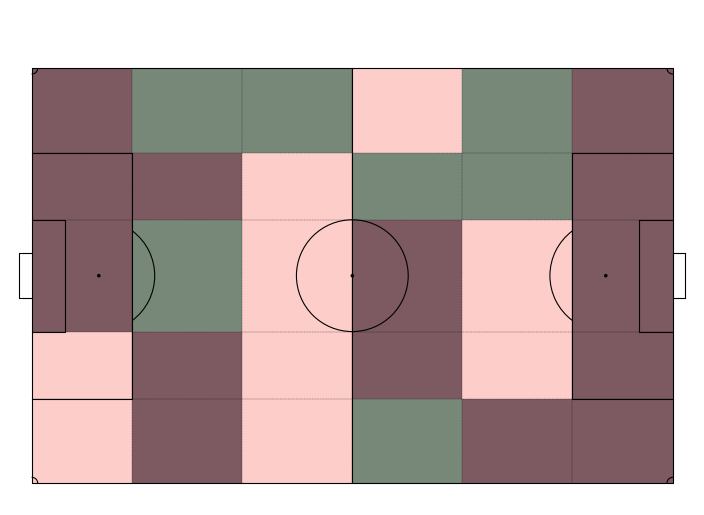

In [2]:
import numpy as np
np.random.seed(42)
from mplsoccer import Pitch
from matplotlib.colors import LinearSegmentedColormap

# random data
x = np.random.uniform(0, 105, 100)
y = np.random.uniform(0, 68, 100)
possession = np.random.choice([True, False], 100)

p = Pitch(pitch_type='uefa',
          goal_type='box',
          linewidth=1.1,
          line_color='black',
          line_zorder=2,
          pad_top=10,
          corner_arcs=True)

# bin data calculating the
# average possession
# by taking mean of boolean
pos_x = p.dim.positional_x
pos_y = p.dim.positional_y
bins = (pos_x, pos_y)
bs = p.bin_statistic(x,
                     y,
                     values=possession,
                     bins=bins,
                     statistic='mean',
                     )
stat = bs['statistic']
bs['statistic'] = np.where(stat < 0.45,
                           0,
                           np.where(stat > 0.55, 1, 0.5))

# set the array to 0, 0.5, 1
# and using cmap
colors = ['#461220',
          '#FCB9B2',
          '#3E5641'
         ]
cmap = LinearSegmentedColormap.from_list('cmap', colors, N=3)

# plot
figsize = (10, 10 / p.ax_aspect)
fig, ax = p.draw(figsize=figsize)
hm = p.heatmap(bs, zorder=1.5, ec='None', lw=2, alpha=0.7, cmap=cmap, ax=ax)
# matplotlib bug pcolormesh ls argument
# doesn't work currently so plotting manually
for x in pos_x[1:-1]:
    ax.plot([x,x], [pos_y[0], pos_y[-1]], color='#000000', ls='dashed', zorder=3, lw=0.3)
for y in pos_y[1:-1]:
    ax.plot([pos_x[0], pos_x[-1]], [y,y], color='#000000', ls='dashed', zorder=3, lw=0.3)